# Plotting up salinity results from SalishSeaCast using xarray

This is testing code following a tutorial by Doug that is saved here: 
    http://nbviewer.jupyter.org/urls/bitbucket.org/salishsea/analysis-doug/raw/tip/notebooks/SalishSeaCastVizDemo.ipynb

## First start with imports

In [3]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import arrow 
import cmocean

In [4]:
%matplotlib inline

In [5]:
np.__version__

'1.13.3'

In [6]:
xr.__version__

'0.10.9'

## Load Data

In [7]:
ds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')

In [8]:
ds.salinity

<xarray.DataArray 'salinity' (time: 36048, depth: 40, gridY: 898, gridX: 398)>
[515347975680 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2014-09-14T00:30:00 ... 2018-10-28T23:30:00
  * depth    (depth) float32 0.5 1.5 2.50001 3.50003 ... 387.603 414.534 441.466
  * gridY    (gridY) int16 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int16 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
Attributes:
    _ChunkSizes:            [  1  40 898 398]
    colorBarMaximum:        34.0
    colorBarMinimum:        0.0
    coverage_content_type:  modelResult
    ioos_category:          salinity
    long_name:              salinity
    standard_name:          sea_water_reference_salinity
    units:                  g kg-1

## Plot surface salinity 

Use "isel" to select location based on index [0 39]

In [9]:
SSS_t0_z0 = ds.salinity.isel(time=1, depth=1)
SSS_t0_z39= ds.salinity.isel(time=1, depth=39)

In [10]:
SSS_t0_z0

<xarray.DataArray 'salinity' (gridY: 898, gridX: 398)>
[357404 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2014-09-14T01:30:00
    depth    float32 1.5
  * gridY    (gridY) int16 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int16 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
Attributes:
    _ChunkSizes:            [  1  40 898 398]
    colorBarMaximum:        34.0
    colorBarMinimum:        0.0
    coverage_content_type:  modelResult
    ioos_category:          salinity
    long_name:              salinity
    standard_name:          sea_water_reference_salinity
    units:                  g kg-1

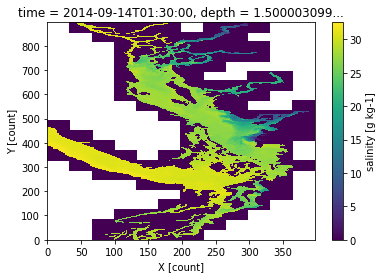

In [11]:
SSS_t0_z0.plot()

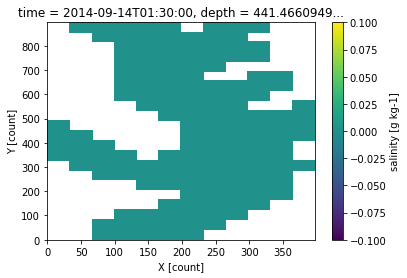

In [12]:
SSS_t0_z39.plot()

Salinity is zero at the bottom because this isn't a sigma-coordinate model

In [13]:
SSS_t0_z30= ds.salinity.isel(time=1, depth=30)

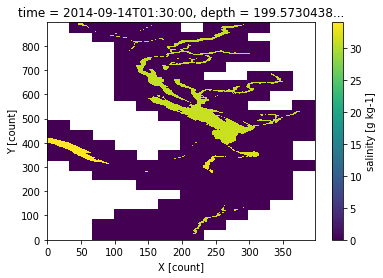

In [14]:
SSS_t0_z30.plot()

The nice thing about z-coordinate models is that they help you visualize topographic bariers more easily!


## Now let's try to make a pretty plot

In [ ]:
# This section includes code from Elise that makes use of a netcdf version 
# of bathymetry.  I haven't yet setup sshfs to allow for skookum access on 
# local computer 

# from salishsea_tools import evaltools as et, viz_tools
# import netCDF4 as nc
# grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
# viz_tools.plot_coastline(ax, grid, coords = 'map')
# ax.set_ylim(48, 50.5)
# ax.legend()
# ax.set_xlim(-125.7, -122.5);

In [23]:
# I have modified the above to work with bathy on ERDDAP

###  need to install GSW #####
grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02')

# This next bit is taken from Elise's code that she shared with us during group meeting
import salishsea_tools.evaltools as viz_tools

# import evaltools as viz_tools
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.set_xlim(-125.7, -122.5);
ax.set_xlabel('Lon.')
ax.set_ylabel('Lat.')

ModuleNotFoundError: No module named 'gsw'